# Reporte de Inteligencia de Negocios

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

**Reporte de solicitudes diarias**

In [3]:
def load_rdbms_requests_table():
    # --< In Jupyter not is possibel to use __file__ > ---------------  
    # module_path = os.path.dirname(__file__)
    # filename = os.path.join(module_path, "../operational_rdbms/requests_table.csv")
    # -----------------------------------------------------------------
    filename = "../operational_rdbms/requests_table.csv"
    if not os.path.exists(filename):
        raise FileNotFoundError(f"File {filename} not found")
    data = pd.read_csv(filename, sep=",")
    return data

In [4]:
def select_last_4_weeks_requests(requests_table):
    requests_table = requests_table.copy()
    today = requests_table.open_date.tail(1).values[0]
    today = pd.to_datetime(today)
    last_week = today - pd.Timedelta(days=7*4)
    last_week = last_week.strftime("%Y-%m-%d")
    last_week_requests = requests_table[
        requests_table.open_date >= last_week
    ]
    return last_week_requests

In [5]:
def compute_status_count_per_day():
    requests_table = load_rdbms_requests_table()
    last_4_weeks_requests = select_last_4_weeks_requests(requests_table)
    status_count_per_day = last_4_weeks_requests.groupby(['open_date', 'status'], as_index=False).size() 
    status_count_per_day = status_count_per_day.pivot(index='open_date', columns='status', values='size')
    status_count_per_day = status_count_per_day.fillna(0)
    return status_count_per_day

In [6]:
def plot_status_count_per_day(status_count_per_day):
    status_count_per_day.plot(
        title="Status count per day",
        figsize=(12, 6),
        legend=True,
        fontsize=12,
        grid=True,
        rot=0
    )
    plt.show()

In [7]:
def make_plot_status_count_per_day():
    status_count_per_day = compute_status_count_per_day()
    plot_status_count_per_day(status_count_per_day)
    

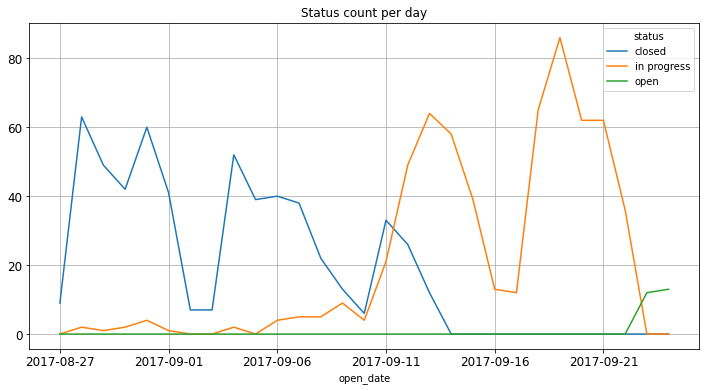

In [8]:
#
# Be sure of run 
#  $ make -C user_simulation/ restart
#
make_plot_status_count_per_day()